In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
calendarDF = pd.read_csv("data/calendar.csv", sep=',')

In [6]:
calendarDF.count()

listing_id    21841235
date          21841235
available     21841235
price          8618452
metro_area    21841235
dtype: int64

## Variables y tipo de dato del dataset

In [7]:
calendarDF.dtypes

listing_id      int64
date           object
available      object
price         float64
metro_area     object
dtype: object

## Descripción de las variables numéricas

In [8]:
calendarDF['price'].describe()

count    8.618452e+06
mean     1.772158e+02
std      2.716685e+02
min      1.000000e+01
25%      7.500000e+01
50%      1.200000e+02
75%      2.000000e+02
max      2.000000e+04
Name: price, dtype: float64

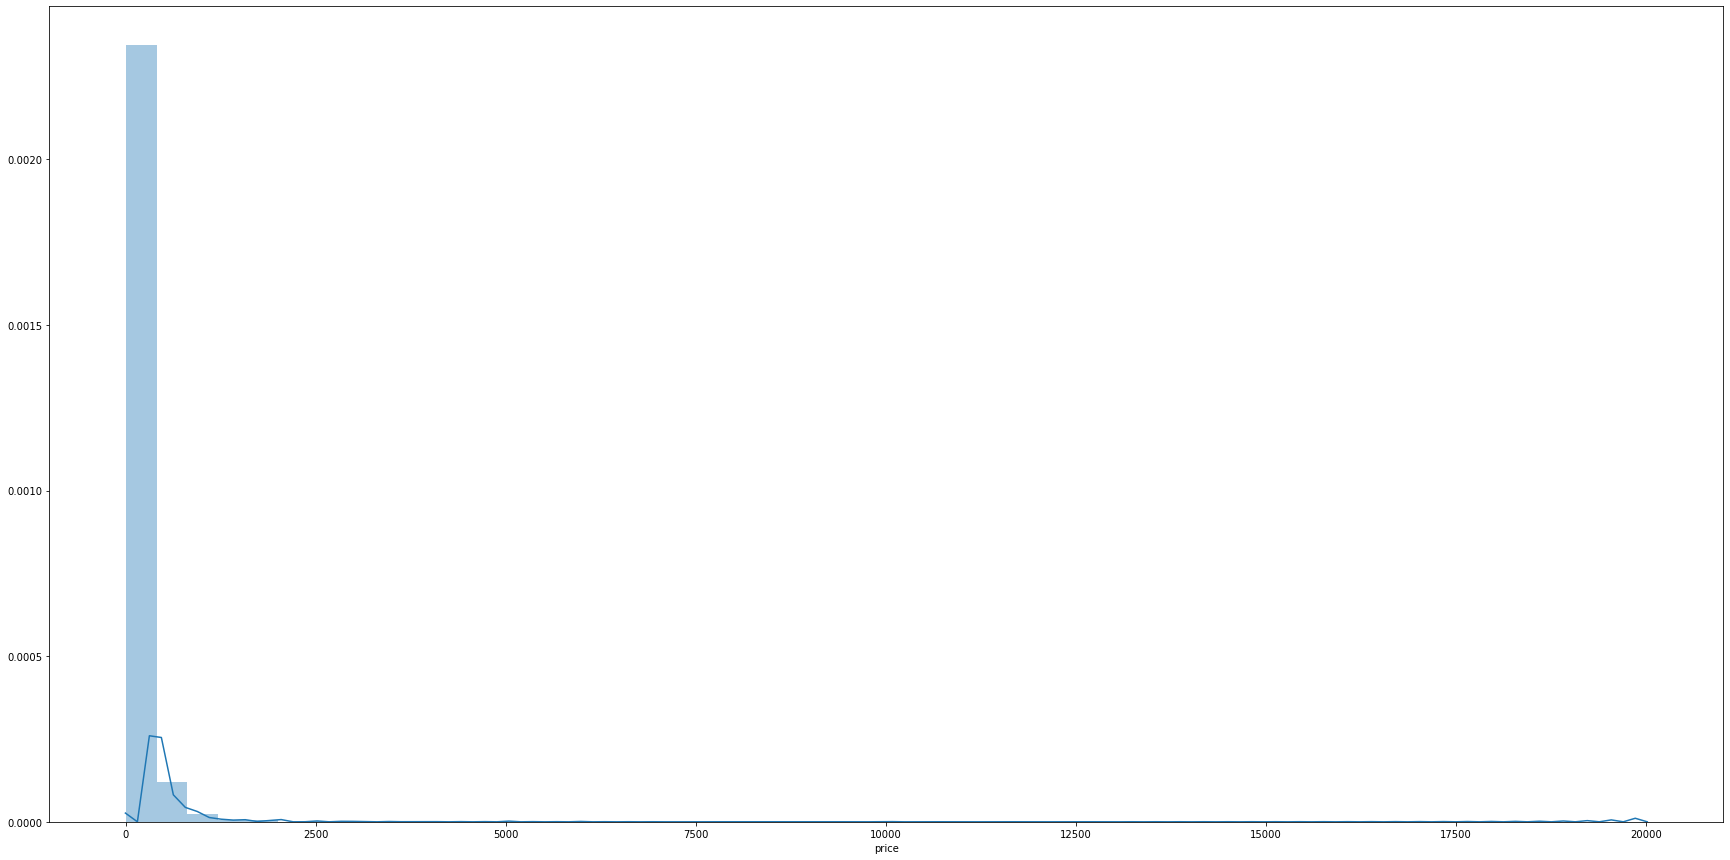

In [9]:
fig,ax = plt.subplots(figsize=(30,15))
sns.distplot(calendarDF["price"])

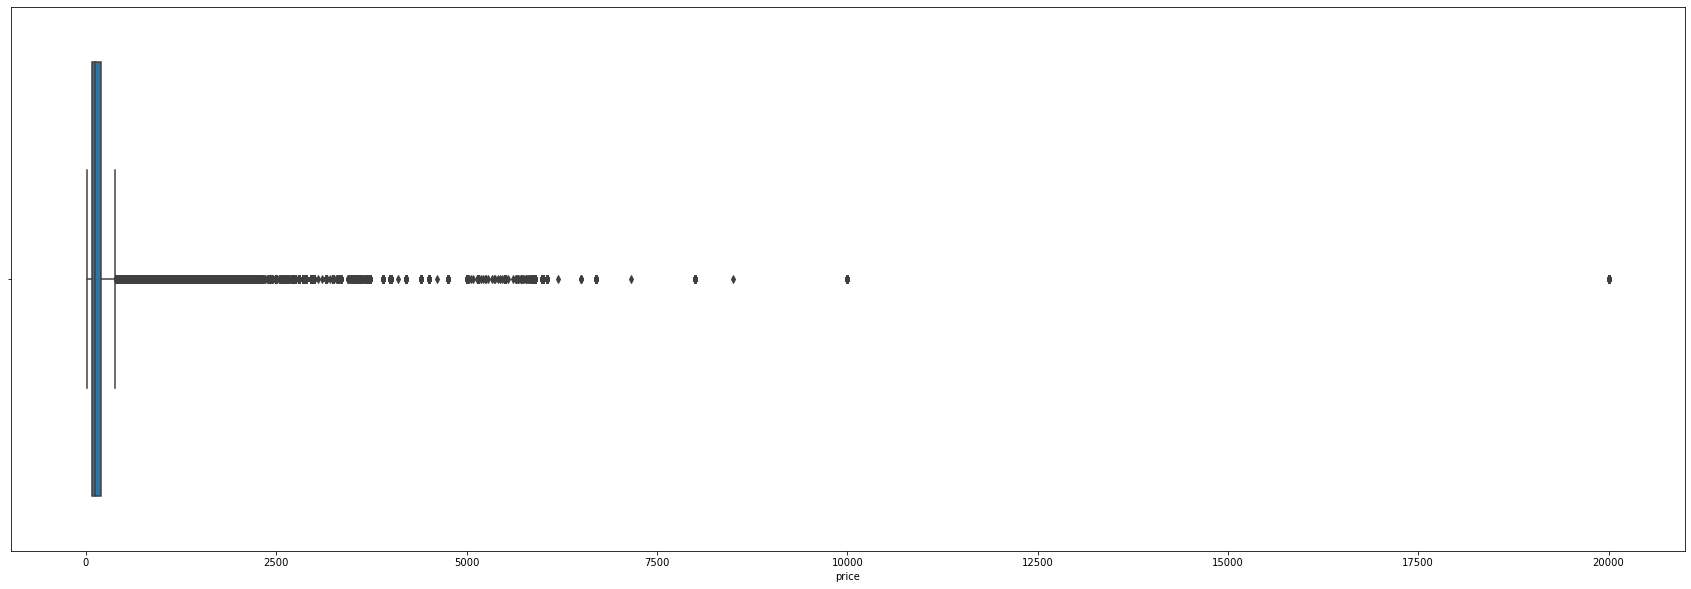

In [10]:
fig,ax = plt.subplots(figsize=(30,10))
sns.boxplot(x=calendarDF["price"])

### Eliminando outliers del dataset

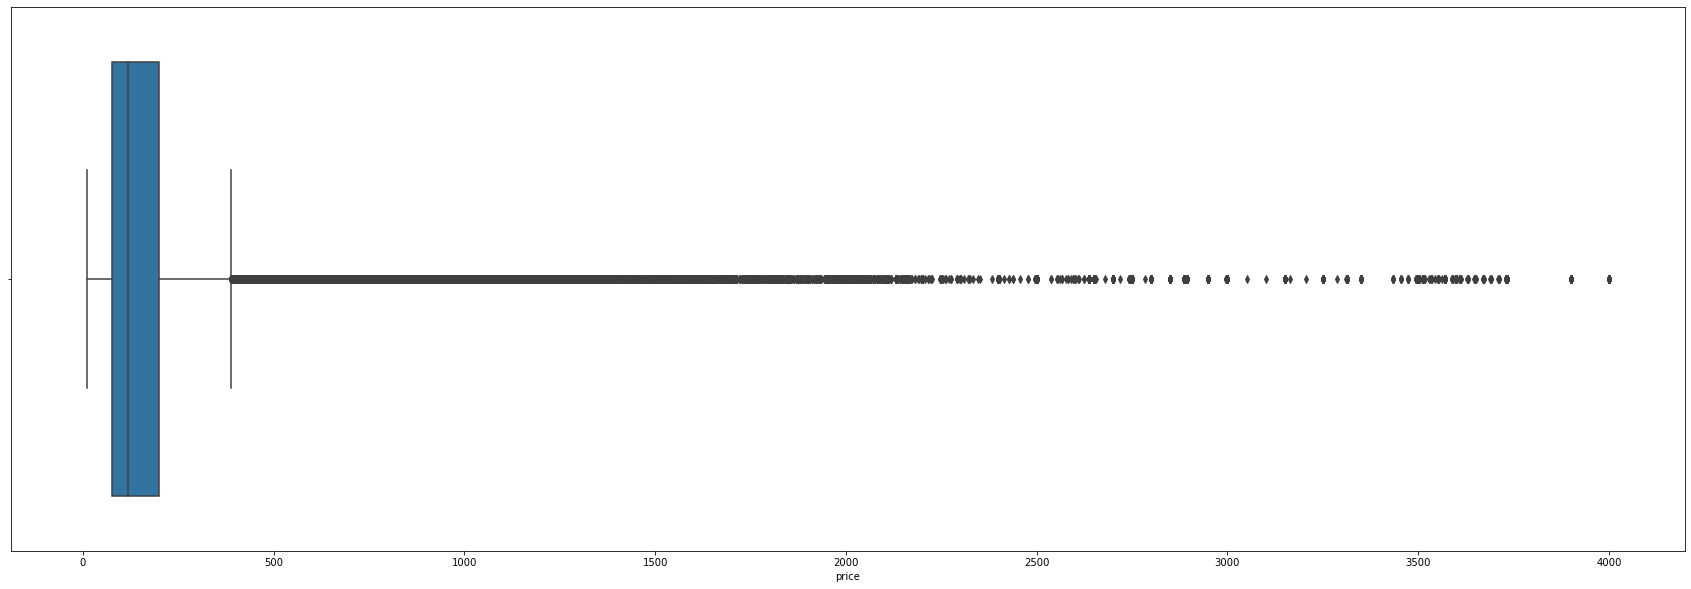

In [11]:
fig,ax = plt.subplots(figsize=(30,10))

filteredCalendarDF = calendarDF[calendarDF['price'] < 4000]
sns.boxplot(x=filteredCalendarDF["price"])

### Cuantos registros están marcado como outliers

In [12]:
limit = 600
calendarDF[calendarDF['price'] > limit].count()

listing_id    229030
date          229030
available     229030
price         229030
metro_area    229030
dtype: int64

### Primera Conclusión: Hay 229.030 registros aproximadamente considerados como outliers

In [13]:
calendarDF[calendarDF['price'] < limit]['price'].describe()

count    8.364343e+06
mean     1.476866e+02
std      1.055368e+02
min      1.000000e+01
25%      7.400000e+01
50%      1.150000e+02
75%      1.900000e+02
max      5.990000e+02
Name: price, dtype: float64

## Descripción de la variable de Fecha

In [14]:
# Revisar el formato
calendarDF['date'].head()

0    2018-03-05
1    2018-03-04
2    2018-03-03
3    2018-03-02
4    2018-03-01
Name: date, dtype: object

### Convertir campo Date en tipo Datetime

In [15]:
calendarDF['date'] = pd.to_datetime(calendarDF['date']) 
calendarDF = calendarDF.sort_values(by='date')

# Oldest and earliest date

print(calendarDF['date'].head(1))
print(calendarDF['date'].tail(1))

15246780   2016-05-17
Name: date, dtype: datetime64[ns]
19135125   2018-05-10
Name: date, dtype: datetime64[ns]


### Creando columnas Año y Mes del campo Fecha

In [16]:
calendarDF['yearDate'] = calendarDF['date'].dt.year
calendarDF['yearDate'] = calendarDF['yearDate'].astype('category')
aggYear = calendarDF.groupby('yearDate').size()
years = aggYear.index

calendarDF['monthDate'] = calendarDF['date'].dt.month
calendarDF['monthDate'] = calendarDF['monthDate'].astype('category')
aggMonth = calendarDF.groupby('monthDate').size()
months = aggMonth.index

In [17]:
calendarDF.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
metro_area            object
yearDate            category
monthDate           category
dtype: object

### Análisis por año

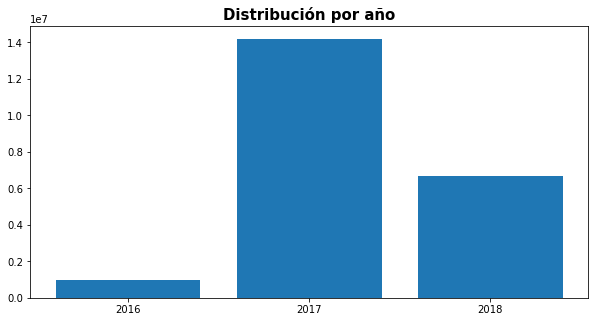

In [18]:
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(years, aggYear)
plt.title('Distribución por año', fontsize=15, fontweight="bold")
plt.xticks([2016, 2017, 2018])
plt.show()

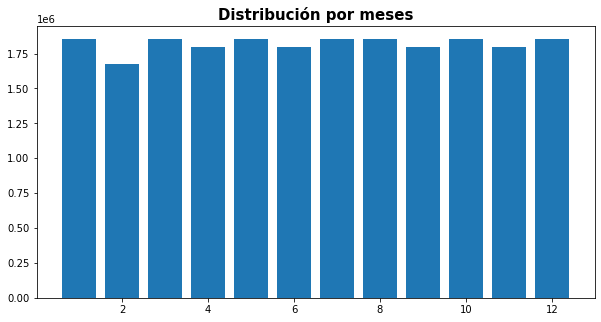

In [19]:
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(months, aggMonth)
plt.title('Distribución por meses', fontsize=15, fontweight="bold")
plt.show()

In [20]:
calendarDF['yearDate'].unique()

[2016, 2017, 2018]
Categories (3, int64): [2016, 2017, 2018]

### Variación del precio con respecto al año

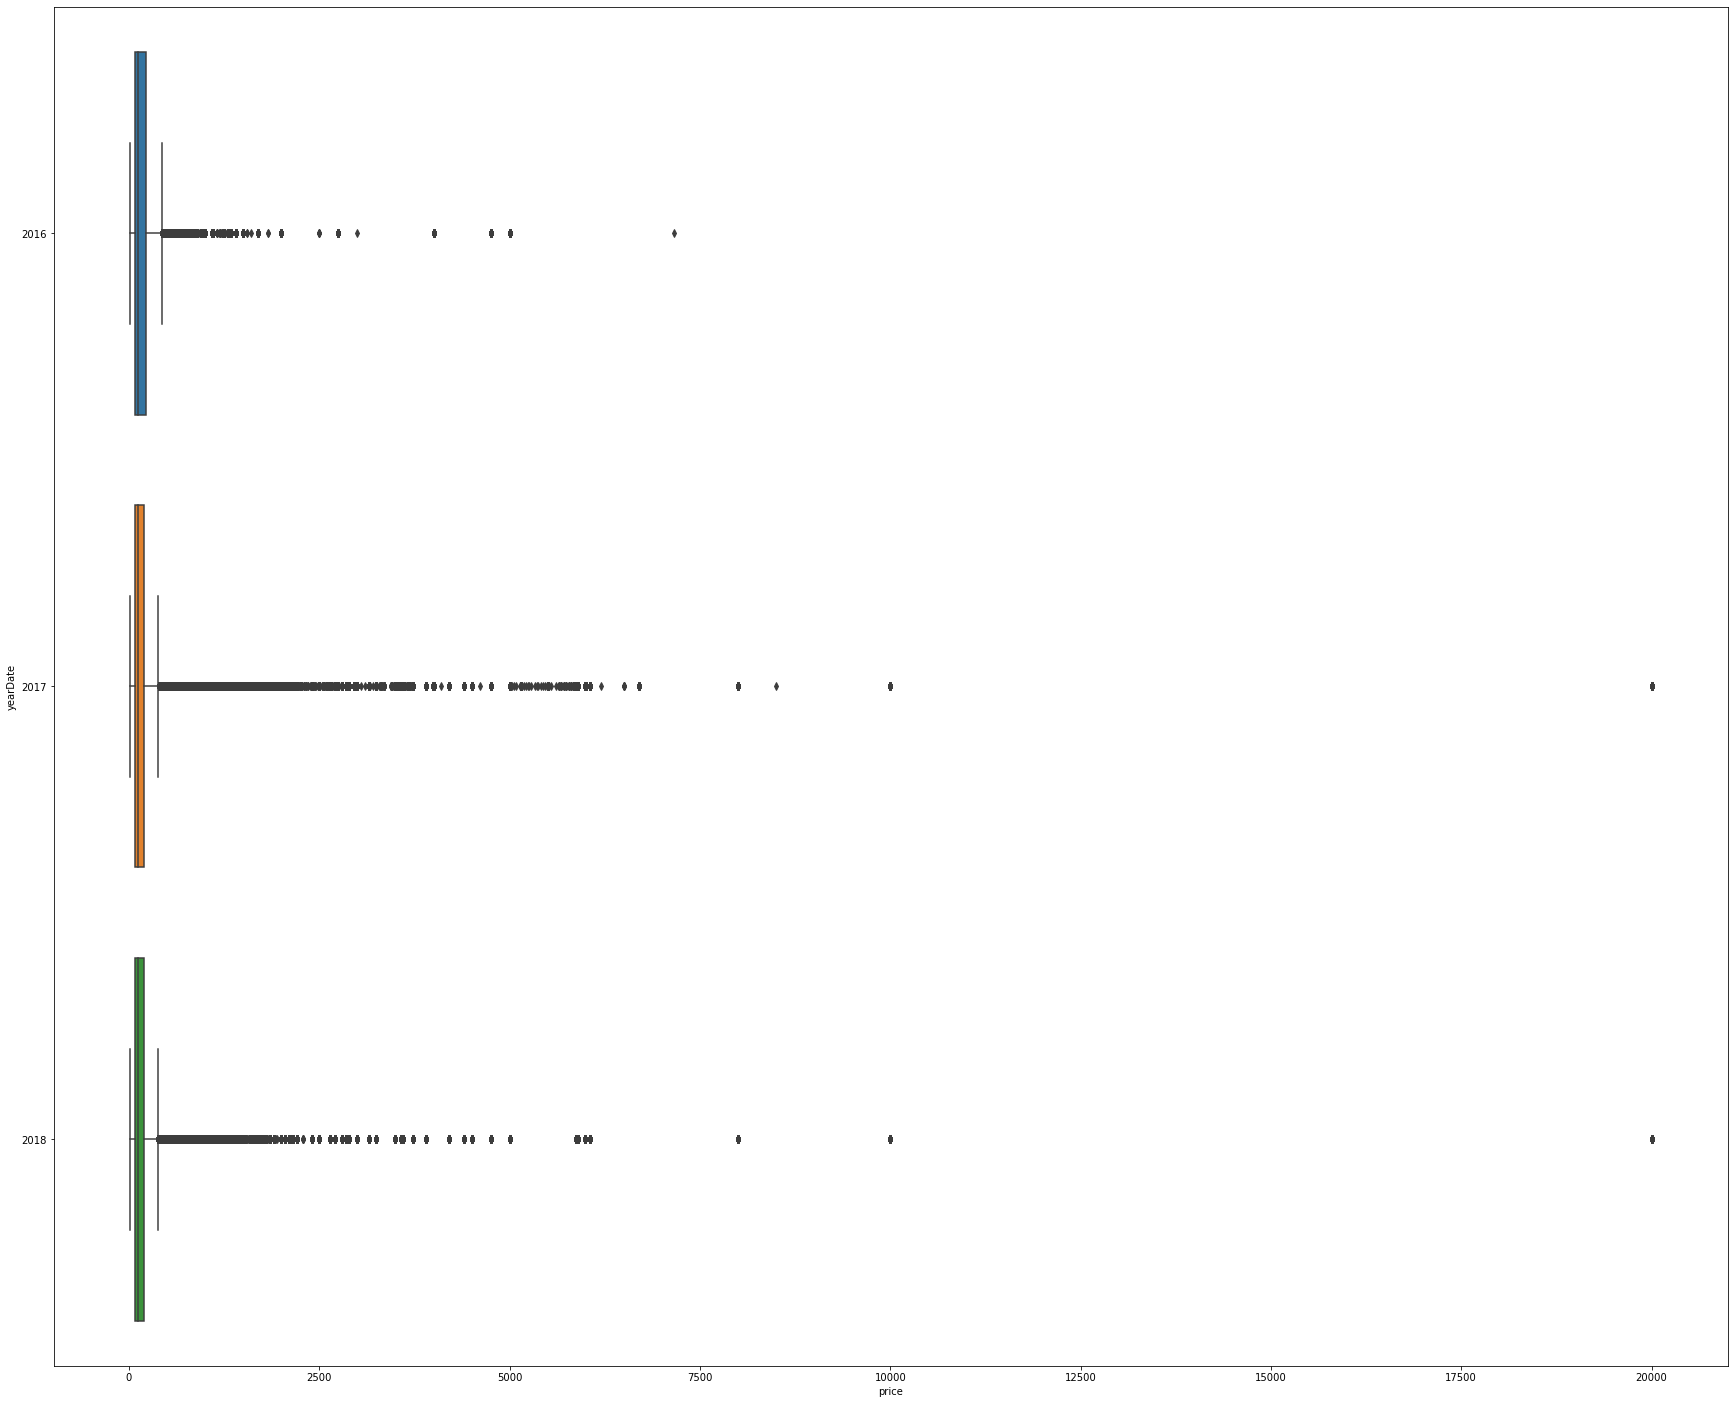

In [21]:
filteredCalendarDF = calendarDF.dropna(subset=['yearDate'])

fig,ax = plt.subplots(figsize=(30,25))
sns.boxplot(y=calendarDF['yearDate'], x=calendarDF['price'])
plt.show()

## Descripción de las variables categóricas

In [22]:
calendarDF.count()

listing_id    21841235
date          21841235
available     21841235
price          8618452
metro_area    21841235
yearDate      21841235
monthDate     21841235
dtype: int64

In [23]:
calendarDF['available'].unique()
calendarDF['available'] = calendarDF['available'].astype('category')
calendarDF.dtypes

listing_id             int64
date          datetime64[ns]
available           category
price                float64
metro_area            object
yearDate            category
monthDate           category
dtype: object

In [24]:
calendarDF.groupby('available').size()

available
f    13222783
t     8618452
dtype: int64

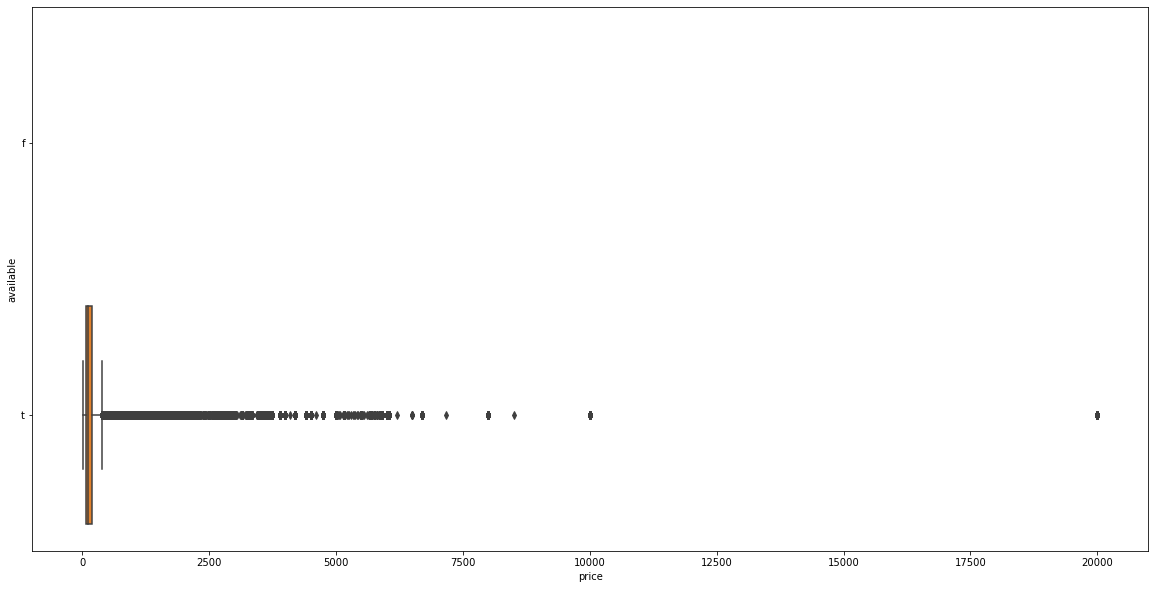

In [25]:
fig,ax = plt.subplots(figsize=(20,10))
sns.boxplot(y=calendarDF['available'], x=calendarDF['price'])

In [26]:
calendarDF['listing_id'] = calendarDF['listing_id'].astype('string')
calendarDF['listing_id'].head()

15246780     8403139
15404095     9491180
15601560     1197430
15427455    12292295
15058440     2139342
Name: listing_id, dtype: string

In [27]:
calendarDF['metro_area'] = calendarDF['metro_area'].astype('category')
calendarDF['metro_area'].unique()

['denver', 'boston', 'NYC', 'chicago', 'dc']
Categories (5, object): ['denver', 'boston', 'NYC', 'chicago', 'dc']

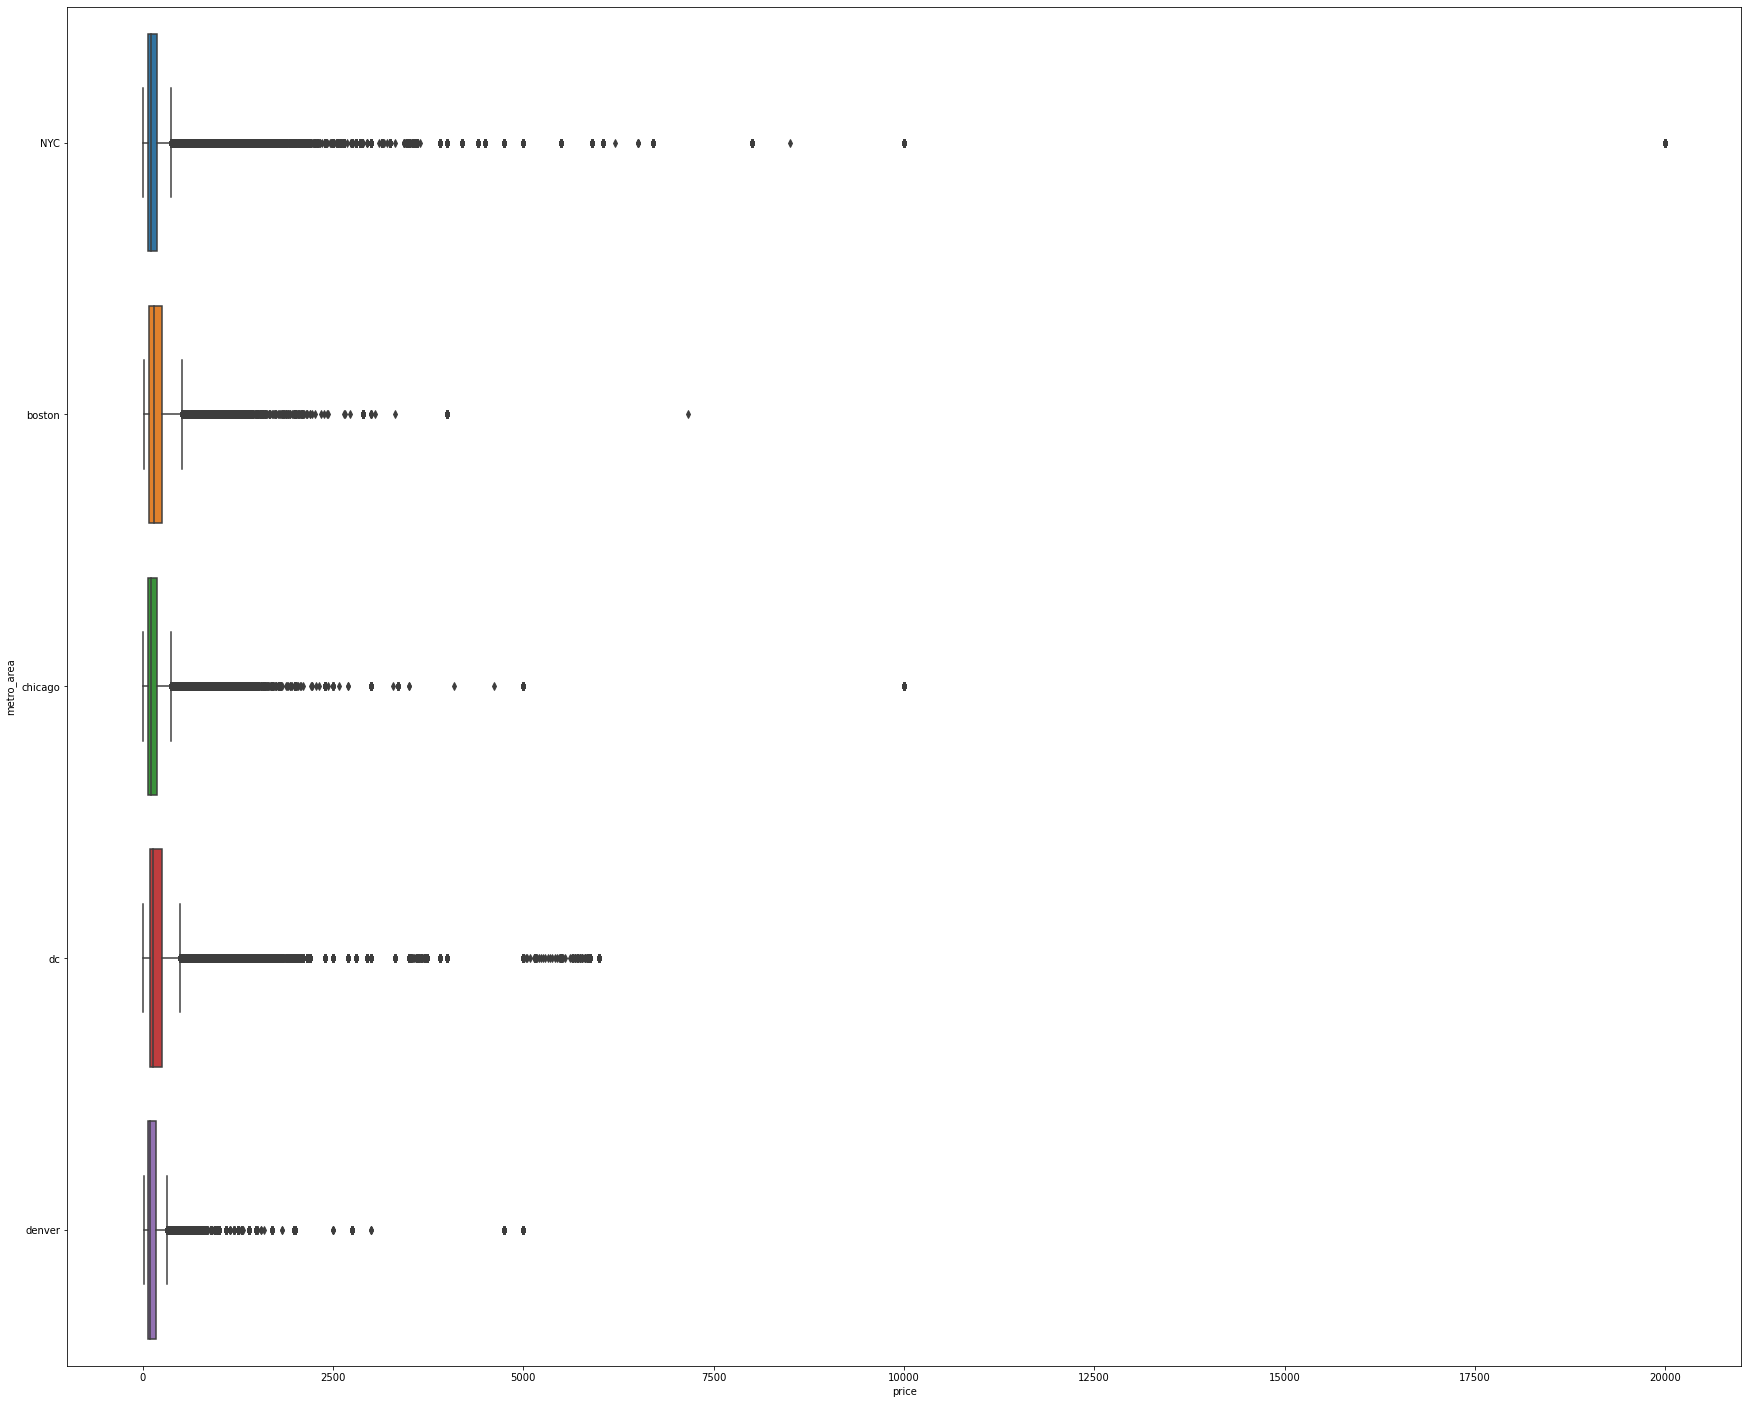

In [28]:
fig,ax = plt.subplots(figsize=(30,25))
sns.boxplot(y=calendarDF['metro_area'], x=calendarDF['price'])